# IHLT Lab 4: Part of Speech

**Authors:** *Zachary Parent ([zachary.parent](mailto:zachary.parent@estudiantat.upc.edu)), Carlos Jiménez ([carlos.humberto.jimenez](mailto:carlos.humberto.jimenez@estudiantat.upc.edu))*

### 2024-10-10

**Instructions:**

1. Consider Treebank corpus.

    - Train HMM, TnT, perceptron and CRF models using the first 500, 1000, 1500, 2000, 2500 and 3000 sentences.

    - Evaluate the resulting 24 models using sentences from 3001.

2. Provide a figure with four learning curves, each per model type (X=training set size; Y=accuracy).

    - Which model would you select? Justify the answer.


## Notes

we should measure the time it takes to train each model.

we could also measure the time it takes to make inferences on the test set

we should plot the accuracy vs the number of sentences.

we could create a ratio of accuracy vs training time for each model.

we could optionally tweak the feature func for CRFTagger


In [31]:
import pandas as pd
import time
import nltk
nltk.download('treebank')

[nltk_data] Downloading package treebank to
[nltk_data]     /Users/zachparent/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

In [33]:
nltk.corpus.treebank.tagged_sents()[1]

[('Mr.', 'NNP'),
 ('Vinken', 'NNP'),
 ('is', 'VBZ'),
 ('chairman', 'NN'),
 ('of', 'IN'),
 ('Elsevier', 'NNP'),
 ('N.V.', 'NNP'),
 (',', ','),
 ('the', 'DT'),
 ('Dutch', 'NNP'),
 ('publishing', 'VBG'),
 ('group', 'NN'),
 ('.', '.')]

In [34]:
## Learning the model

def hidden_markov(train, test):
    def LID(fd, bins):
        return nltk.probability.LidstoneProbDist(fd, 0.1, bins)
    
    trainer = nltk.tag.hmm.HiddenMarkovModelTrainer()
    HMM = trainer.train_supervised(train, estimator=LID)
    return HMM

## TnT

In [36]:

def TnT(train, test):
    TnT = nltk.tag.tnt.TnT()
    TnT.train(train)

    return TnT

# Perceptron

In [37]:
def perceptron(train, test):
    PER = nltk.tag.perceptron.PerceptronTagger(load=False)
    PER.train(train)
    
    return PER
# PER.tag(['the', 'men', 'attended', 'to', 'the', 'meetings']) 

# CRF

In [39]:
def CRF(train, test):
    CRF = nltk.tag.CRFTagger()
    CRF.train(train,'crf_tagger_model')
    
    return CRF
    # CRF.tag(['the', 'men', 'attended', 'to', 'the', 'meetings'])

## Train all models with different sentences number

In [40]:
# Sentences number list
sentences_n = [500, 1000, 1500, 2000, 2500, 3000]
# TODO:remove
sentences_n = [s//10 for s in sentences_n]

In [58]:
test = nltk.corpus.treebank.tagged_sents()[3000:]

accuracy_results = pd.DataFrame(columns=['HMM', 'TnT', 'PER', 'CRF'], index=sentences_n, dtype=float)
training_time_results = pd.DataFrame(columns=['HMM', 'TnT', 'PER', 'CRF'], index=sentences_n, dtype=float)
inference_time_results = pd.DataFrame(columns=['HMM', 'TnT', 'PER', 'CRF'], index=sentences_n, dtype=float)

for n in sentences_n:
    print(f'\033[1mTraining with {n} sentences...\033[0m')
    print()
    for model in [('HMM', hidden_markov), ('TnT', TnT), ('PER', perceptron), ('CRF', CRF)]:
        print()
        print(f'\t\033[1mTraining {model[0]}...\033[0m')
    
        train = nltk.corpus.treebank.tagged_sents()[:n]
        
        start_training_time = time.time()
        trained_model =model[1](train, test)
        end_training_time = time.time()
        training_time_results.loc[n, model[0]] = end_training_time - start_training_time

        start_inference_time = time.time()
        accuracy_results.loc[n, model[0]] = trained_model.accuracy(test)
        end_inference_time = time.time()
        inference_time_results.loc[n, model[0]] = end_inference_time - start_inference_time

        print(pd.DataFrame([
            accuracy_results.loc[n, model[0]],
            training_time_results.loc[n, model[0]],
            inference_time_results.loc[n, model[0]]
        ], index=['Accuracy', 'Training time', 'Inference time']).to_string(col_space=15, ))




Training with 50 sentences...


	Training HMM...
                              0
Accuracy               0.595683
Training time          0.001100
Inference time         1.539590

	Training TnT...
                              0
Accuracy               0.520181
Training time          0.003144
Inference time         0.205475

	Training PER...
                              0
Accuracy               0.722383
Training time          0.110837
Inference time         0.516037

	Training CRF...
                              0
Accuracy               0.749320
Training time          0.057577
Inference time         0.223952
Training with 100 sentences...


	Training HMM...
                              0
Accuracy               0.673818
Training time          0.009453
Inference time         1.483357

	Training TnT...
                              0
Accuracy               0.587222
Training time          0.013506
Inference time         0.207748

	Training PER...
                              0
Accuracy   

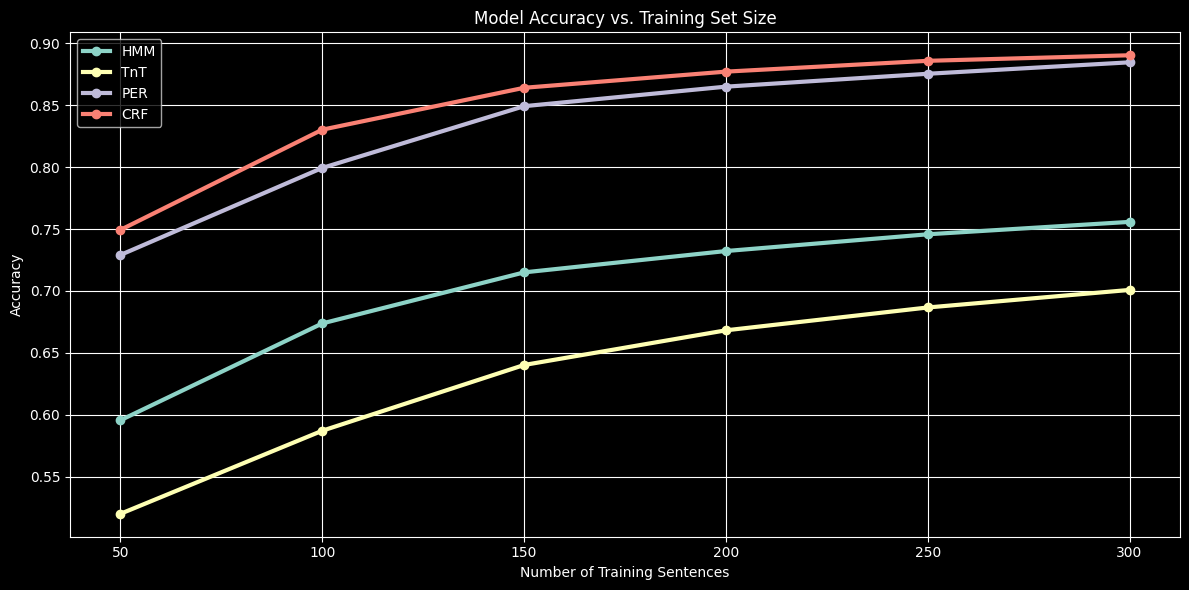

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for model in accuracy_results.columns:
    plt.plot(sentences_n, accuracy_results[model], marker='o', label=model, linewidth=3)

plt.xlabel('Number of Training Sentences')
plt.ylabel('Accuracy')
plt.title('Model Accuracy vs. Training Set Size')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


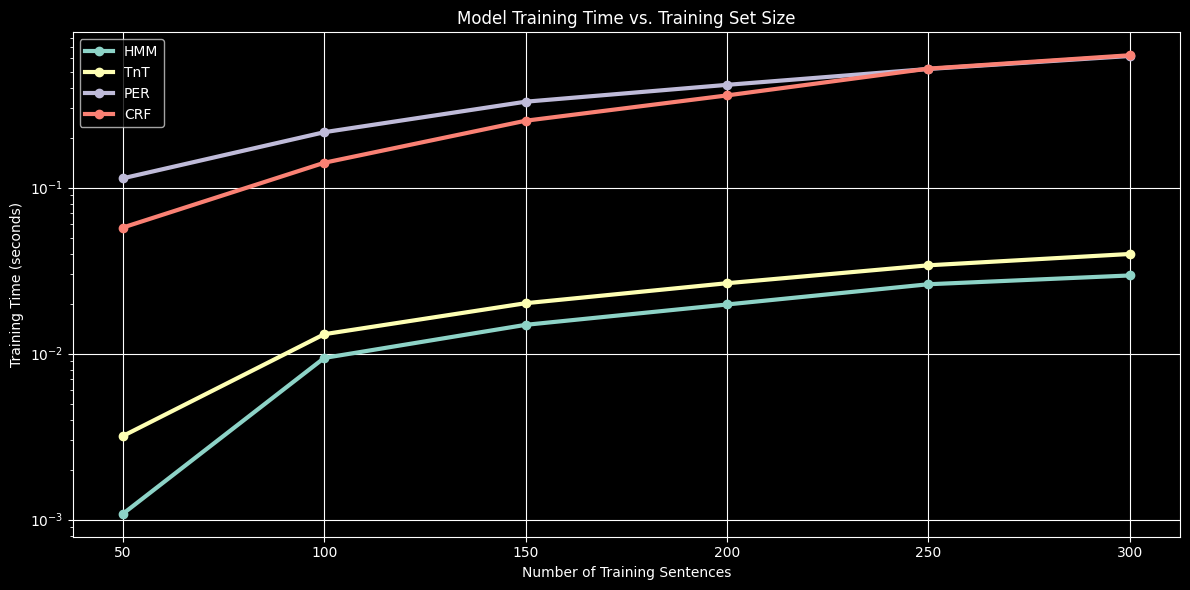

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for model in training_time_results.columns:
    plt.plot(sentences_n, training_time_results[model], marker='o', label=model, linewidth=3)

plt.xlabel('Number of Training Sentences')
plt.ylabel('Training Time (seconds)')
plt.title('Model Training Time vs. Training Set Size')
plt.legend()
plt.grid(True)
plt.yscale('log')  # Using log scale for better visualization of time differences
plt.tight_layout()
plt.show()

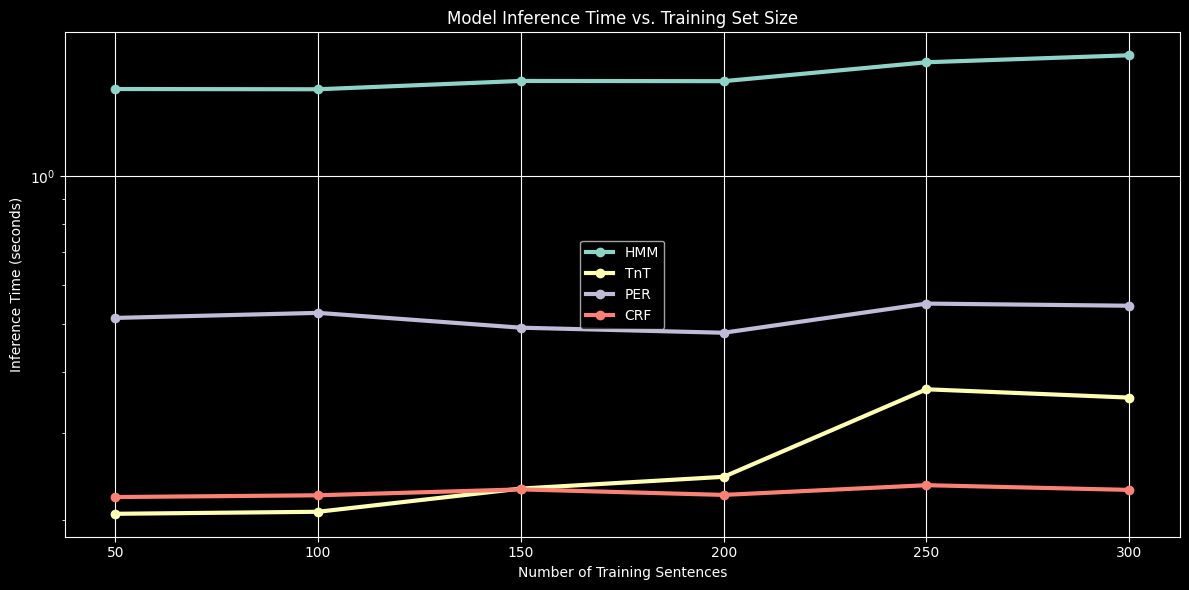

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for model in inference_time_results.columns:
    plt.plot(sentences_n, inference_time_results[model], marker='o', label=model, linewidth=3)

plt.xlabel('Number of Training Sentences')
plt.ylabel('Inference Time (seconds)')
plt.title('Model Inference Time vs. Training Set Size')
plt.legend()
plt.grid(True)
plt.yscale('log')  # Using log scale for better visualization of time differences
plt.tight_layout()
plt.show()


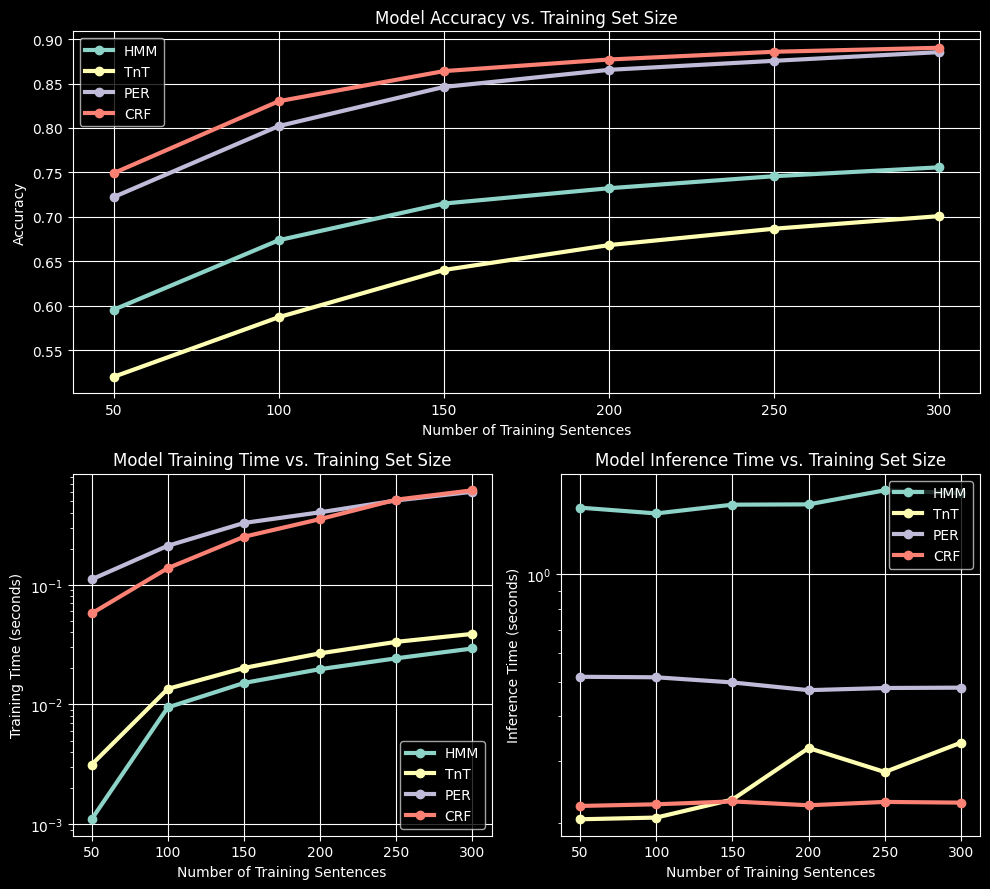

In [61]:
import matplotlib.pyplot as plt

# Define the layout using mosaic
mosaic = [
    ['accuracy', 'accuracy'],
    ['training', 'inference']
]

# Create a figure with the defined mosaic layout
fig, axd = plt.subplot_mosaic(mosaic, figsize=(10, 9))

# Accuracy plot (top row, spanning both columns)
for model in accuracy_results.columns:
    axd['accuracy'].plot(sentences_n, accuracy_results[model], marker='o', markersize=6, label=model, linewidth=3)
axd['accuracy'].set_xlabel('Number of Training Sentences')
axd['accuracy'].set_ylabel('Accuracy')
axd['accuracy'].set_title('Model Accuracy vs. Training Set Size')
axd['accuracy'].legend()
axd['accuracy'].grid(True)

# Training Time plot (bottom left)
for model in training_time_results.columns:
    axd['training'].plot(sentences_n, training_time_results[model], marker='o', markersize=6, label=model, linewidth=3)
axd['training'].set_xlabel('Number of Training Sentences')
axd['training'].set_ylabel('Training Time (seconds)')
axd['training'].set_title('Model Training Time vs. Training Set Size')
axd['training'].legend()
axd['training'].grid(True)
axd['training'].set_yscale('log')

# Inference Time plot (bottom right)
for model in inference_time_results.columns:
    axd['inference'].plot(sentences_n, inference_time_results[model], marker='o', markersize=6, label=model, linewidth=3)
axd['inference'].set_xlabel('Number of Training Sentences')
axd['inference'].set_ylabel('Inference Time (seconds)')
axd['inference'].set_title('Model Inference Time vs. Training Set Size')
axd['inference'].legend()
axd['inference'].grid(True)
axd['inference'].set_yscale('log')

plt.tight_layout()
plt.show()


## TODO:
"""

Provide a figure with four learning curves, each per model type (X=training set size; Y=accuracy).

Which model would you select? Justify the answer.

"""